In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_csv("data/Credit_Card_Applications.csv")
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
X = data.drop(["Class","CustomerID"],axis=1)
y = data["Class"]

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=10,input_dim=14,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

r = model.fit(x=X_train,y=y_train,epochs=150,batch_size=10,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/150
56/56 [==============================] - 1s 12ms/step - loss: 0.5935 - accuracy: 0.7075 - val_loss: 0.6079 - val_accuracy: 0.7246
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.7658 - val_loss: 0.5402 - val_accuracy: 0.7754
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.8265 - val_loss: 0.4818 - val_accuracy: 0.8188
Epoch 4/150
56/56 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8269 - val_loss: 0.4386 - val_accuracy: 0.8188
Epoch 5/150
56/56 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.8482 - val_loss: 0.4061 - val_accuracy: 0.8333
Epoch 6/150
56/56 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8700 - val_loss: 0.3884 - val_accuracy: 0.8551
Epoch 7/150
56/56 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8777 - val_loss: 0.3752 - val_accuracy: 0.8623
Epoch 8/150


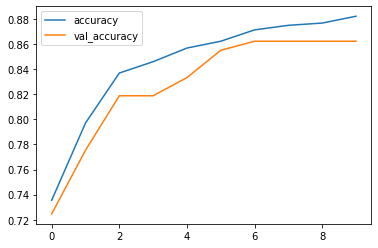

In [7]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend();

In [8]:
_,accuracy = model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 985us/step - loss: 0.3611 - accuracy: 0.8623


In [9]:
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 86.23%
